In [69]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#data split
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
train = pd.read_csv('TitanicTrain.csv')
test = pd.read_csv('TitanicTest.csv')

In [21]:
print("Attributes\n",train.columns.values)

Attributes
 ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


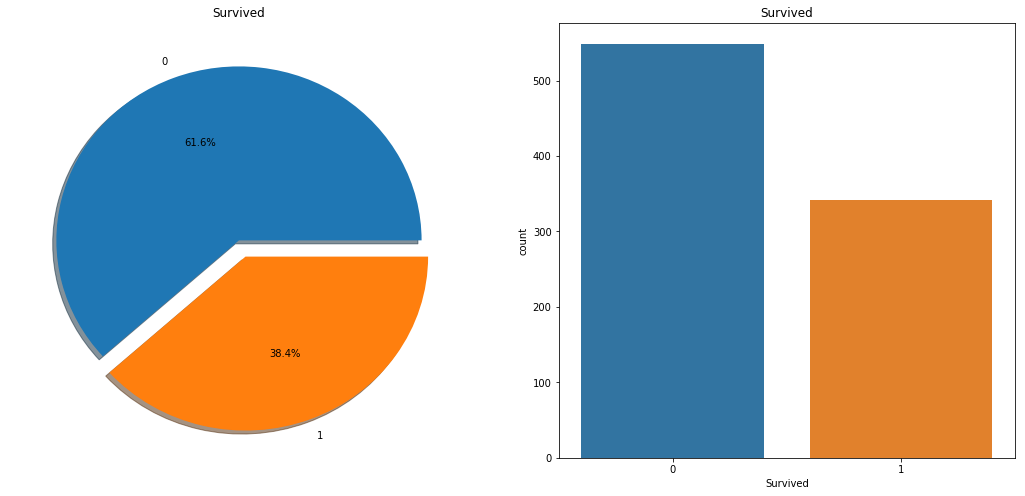

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h3>Feature Analysis<h3>

In [26]:
print('Featured hights correlation with survival')
print('Feature\tCorrelation')
Survive_Corr = train.corr()["Survived"]
Survive_Corr = Survive_Corr[1:9] # remove the 'Survived'
Survive_Corr= Survive_Corr[np.argsort(Survive_Corr, axis = 0)[::-1]] #sort in descending order
print(Survive_Corr)

Featured hights correlation with survival
Feature	Correlation
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


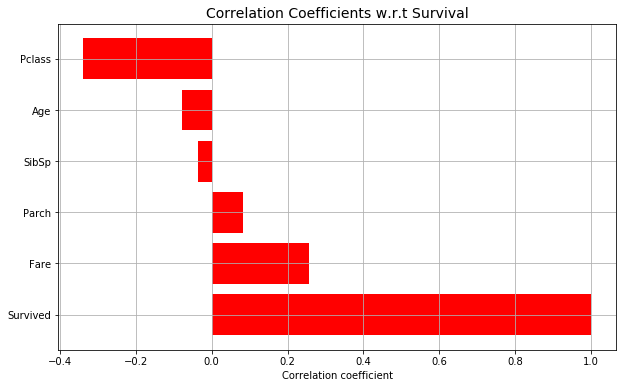

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
rects = ax.barh(np.arange(len(Survive_Corr)), np.array(Survive_Corr.values), color = 'red')
ax.set_yticks(np.arange(len(Survive_Corr)))
ax.set_yticklabels(Survive_Corr.index, rotation ='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Survival",fontsize = 14);
ax.grid(True)

status i.e given by Pclass and fare is highly significant for chance of survival

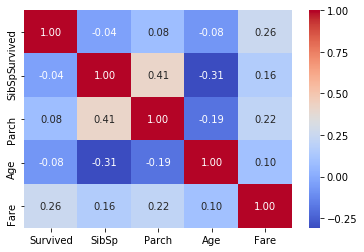

In [28]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

according to this fare is the most determining factor

<h3>Individual feature survival dependency <h3>

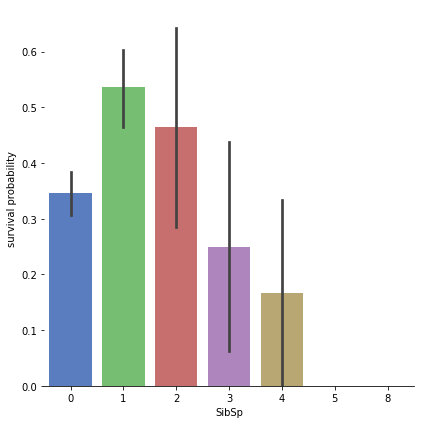

In [29]:
# Explore no of siblings  vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")


no of siblings or spouses inversely proportional to chance of survival.

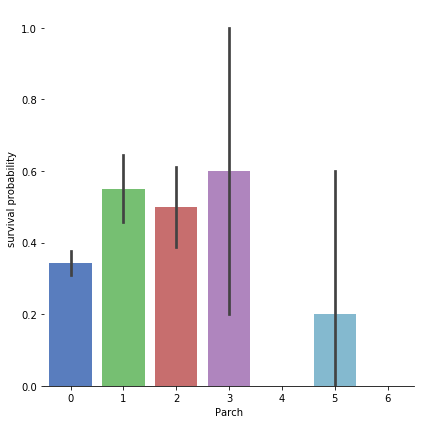

In [30]:
#survival on basis of people in family

g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

small families have more chances of living than individiuals or big families

In [31]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


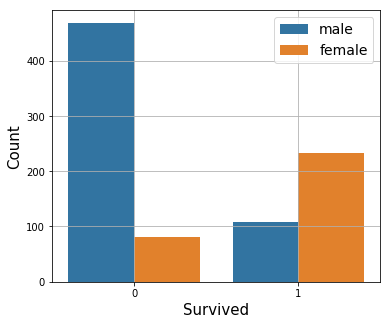

In [33]:
# plot survival count for male and female
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
b = sns.countplot(x = 'Survived',hue = 'Sex', data = train);
b.set_xlabel("Survived",fontsize = 15)
b.set_ylabel("Count",fontsize = 15)
b.legend(fontsize = 14)
plt.grid('True')


#survival probability of males and females


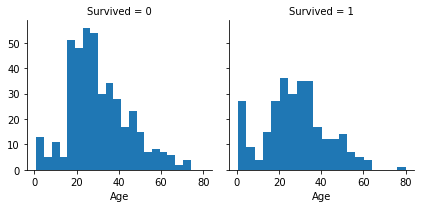

In [34]:
#survival on basis of age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


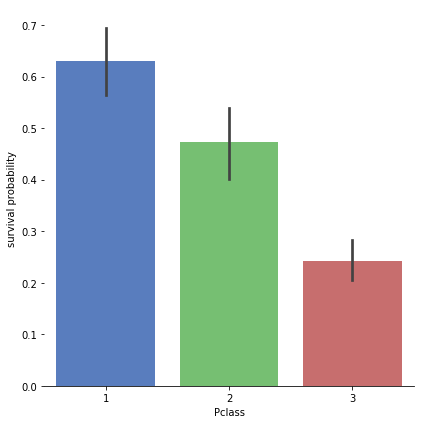

In [35]:
#survival based on class
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")



Pclass 3 is most likely to not survive

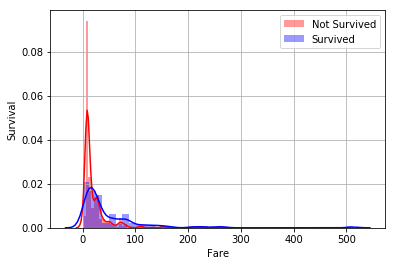

In [36]:
g = sns.distplot(train["Fare"][(train["Survived"] == 0) & (train["Fare"].notnull())], color="Red")
g = sns.distplot(train["Fare"][(train["Survived"] == 1) & (train["Fare"].notnull())], ax =g, color="Blue")
g.set_xlabel("Fare")
g.set_ylabel("Survival")
g = g.legend(["Not Survived","Survived"])
plt.grid('True')

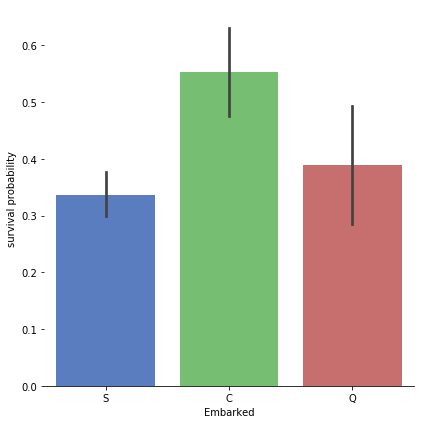

In [37]:
g = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")


people from Cherbourg (C) have more chance to survive.
Lets see why 

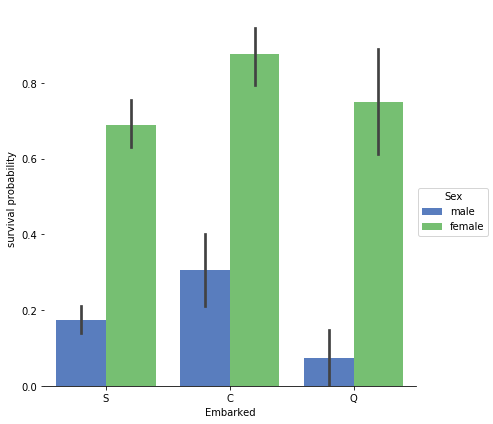

In [38]:
g = sns.factorplot(x="Embarked",y="Survived",hue='Sex',data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")


Because they have max females

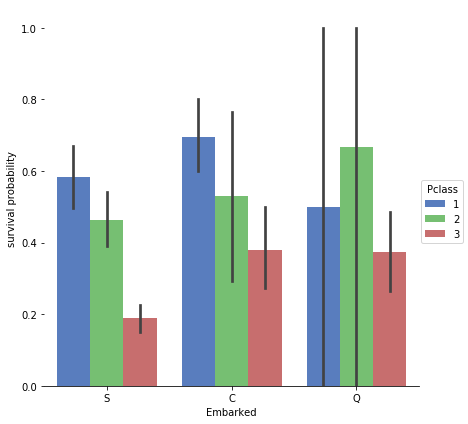

In [39]:
g = sns.factorplot(x="Embarked",y="Survived",hue='Pclass',data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")


Because they have max people from pclass 1

Text(0.5,1,'No. Of Passengers Boarded')

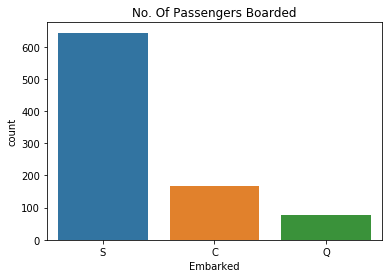

In [40]:
sns.countplot('Embarked',data=train)
plt.title('No. Of Passengers Boarded')

Max no of people were from S

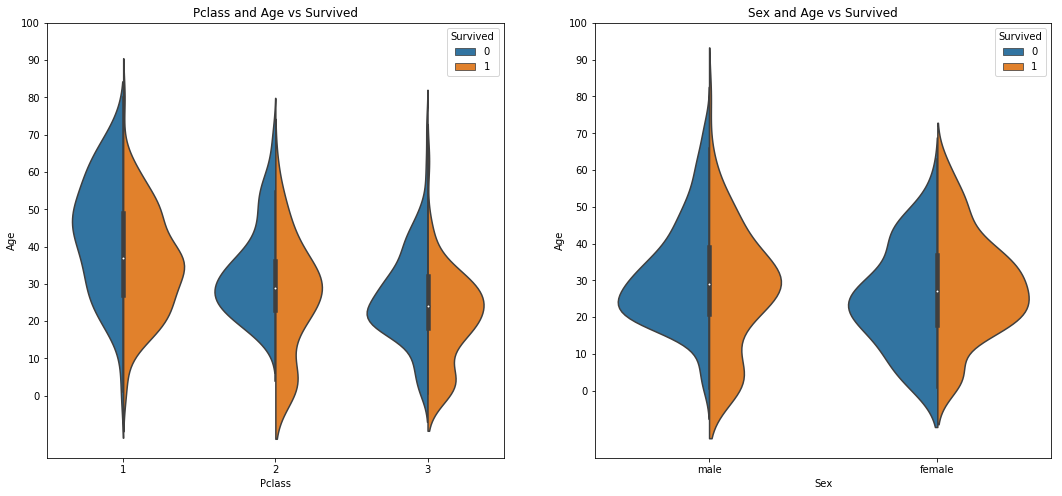

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


Young children are likely to survive irrespective of any class

<h3> Filling in the missing values <h3>

Age

In [42]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [43]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') 

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [45]:
train.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

so filing NaN age values

In [46]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [47]:
print(train.loc[train.Age.isnull()])

     PassengerId  Survived  Pclass                       Name   Sex  Age  \
766          767         0       1  Brewe, Dr. Arthur Jackson  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked Initial  
766      0      0  112379  39.6   NaN        C      Dr  


In [48]:
train.loc[(train.Age.isnull())&(train.Initial=='Dr'),'Age']=42

In [49]:
train.Age.isnull().any()

False

Filling embarked

In [50]:
train.loc[(train.Embarked.isnull())]='S'

In [51]:
train.Embarked.isnull().any()

False

In [52]:
train.SibSp.isnull().any()

False

In [53]:
train.Fare.isnull().any()

False

In [54]:
train.Pclass.isnull().any()

False

In [55]:
train.Parch.isnull().any()

False

In [56]:
train.drop('Cabin', axis=1, inplace=True)


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null object
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null object
Embarked       891 non-null object
Initial        891 non-null object
dtypes: object(12)
memory usage: 83.6+ KB


In [58]:
passengerId = test.PassengerId

# merge train and test
train = train.append(test, ignore_index=True)
# create indexes to separate data later on
train_idx = len(train)
test_idx = len(train) - len(test)

<h2>Prediction<h2>

In [59]:
train.head()

,Age,Cabin,Embarked,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.25,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,NaN,C,71.2833,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,NaN,S,7.925,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,NaN,S,53.1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,NaN,S,8.05,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [60]:
train['gender_factor'] = pd.factorize(train.Sex)[0]
train.drop('Sex', axis=1, inplace=True)

In [61]:
train['Embark'] = pd.factorize(train.Embarked)[0]
train.drop('Embarked', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
train.drop('Initial', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)

In [62]:
train.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,gender_factor,Embark
0,22,7.25,0,1,3,1,0,0,0
1,38,71.2833,0,2,1,1,1,1,1
2,26,7.925,0,3,3,0,1,1,0
3,35,53.1,0,4,1,1,1,1,0
4,35,8.05,0,5,3,0,0,0,0


In [63]:
X_train,X_test,y_train,y_test=train_test_split(train,train.Survived)

In [64]:
clf=KNeighborsClassifier()

pandas.core.series.Series

In [68]:
#clf.fit(X_train,y_train)